# Redes Neurais

## 1. Introdução

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000,activation='logistic')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

C:\Users\bruno.bazelato\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0

# 2. MNIST

In [5]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense, Conv2D, Flatten, Input, Dropout
import matplotlib.pyplot as plt

%matplotlib tk

Using TensorFlow backend.


In [36]:
import mnist

x_train_, y_train_ = mnist.train_images(), mnist.train_labels()
x_test_, y_test_ = mnist.test_images(), mnist.test_labels()

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
x_train = np.array(x_train_).astype('float32')
x_test = np.array(x_test_).astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train_, 10)
y_test = keras.utils.to_categorical(y_test_, 10)

In [45]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [46]:
X_in = Input(shape=(784,))
X = Dense(10, activation='softmax')(X_in)

model = Model(inputs=X_in, outputs=X)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s 38us/step - loss: 7.8293 - acc: 0.5065 - val_loss: 6.4528 - val_acc: 0.5928


In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.36238479455709455
Test accuracy: 0.9059


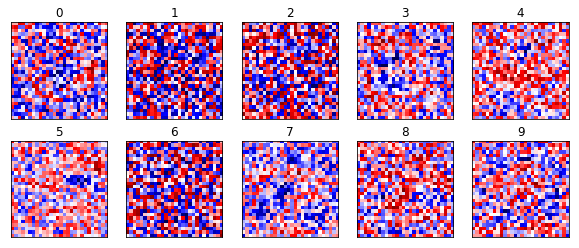

In [48]:
weights = model.get_weights()[0]
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())
    a.set_yticks(())
plt.show()

In [49]:
weights

array([[ 0.02930296,  0.0652855 ,  0.08368085, ...,  0.07116435,
         0.0310551 ,  0.08082869],
       [ 0.02682459,  0.07032921,  0.02190553, ..., -0.02943824,
         0.05856437, -0.00093383],
       [ 0.08599097, -0.08638357, -0.03164064, ...,  0.02569585,
        -0.06884488,  0.03636964],
       ...,
       [-0.02407773,  0.04920005,  0.07104311, ..., -0.02126919,
        -0.07468413, -0.04124118],
       [ 0.03579088, -0.03606195, -0.04163135, ...,  0.04181703,
        -0.06942301,  0.0550446 ],
       [ 0.0615196 , -0.0018602 ,  0.02544086, ...,  0.05151961,
        -0.03264228, -0.08690143]], dtype=float32)

### Aplicando Convolução

In [38]:
x_train = x_train_.reshape(x_train_.shape[0], 28, 28, 1)
x_test = x_test_.reshape(x_test_.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
X_in = Input(shape=input_shape)
X = Conv2D(32, kernel_size=(3, 3), activation='relu')(X_in)
X = Conv2D(64, (3, 3), activation='relu')(X)
X = Dropout(0.5)(X)
X = Flatten()(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.5)(X)
X = Dense(10, activation='softmax')(X)

model = Model(inputs=X_in, outputs=X)
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=100,epochs=10,validation_data=(x_test, y_test), )

In [42]:
m = model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
